In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.widgets import Slider #for making interactive plots
%matplotlib inline


plt.rc('font',family ='serif')
plt.rc('text',usetex =True)

In [24]:
def f(Psi,t,params):
    w0,w1,w = params
    w0 = w0*w00
    w1 = w1*w00
    w = w*w00
    aR = Psi[0]
    aI = Psi[1]
    bR = Psi[2]
    bI = Psi[3]
    daR = 1/2*(w0*aI+w1*np.cos(w*t)*bI)
    daI = -1/2*(w0*aR+w1*np.cos(w*t)*bR)
    dbR =  1/2*(w1*np.cos(w*t)*aI-w0*bI)
    dbI =  -1/2*(w1*np.cos(w*t)*aR-w0*bR)
    
    return np.array([daR,daI,dbR,dbI])


def RK_Solve(f,t0,tf,aR0,aI0,bR0,bI0,N,params):
    w0,w1,w = params
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    aR = []
    aI =[]
    bR= []
    bI = []

    r = np.array([aR0,aI0,bR0,bI0],complex)
    for t in tpoints:
        aR.append(r[0])
        aI.append(r[1])
        bR.append(r[2])
        bI.append(r[3])

        k1 = h*f(r,t,params)
        k2 = h*f(r+0.5*k1,t+0.5*h,params)
        k3 = h*f(r+0.5*k2,t+0.5*h,params)
        k4 = h*f(r+k3,t+h,params)
        r += 1/6*(k1+2.*k2+2.*k3+k4)
         
    return tpoints,np.array(aR),np.array(aI),np.array(bR),np.array(bI)



In [25]:
# find P_up, P_down and transition rate
def P_z(w0,w1,w,r0):
    t = np.linspace(0,3*T1,600)
    params = [w0,w1,w]
#     t,aR,aI,bR,bI= RK_Solve(f,0,3*T1,1.,0.,0.,0.,5000, params =(w0,w1,w)) #solce by Runge Kutta
    psoln = odeint(f, r0, t, args=(params,)) # solve by odeint
    aR = psoln[:,0]
    aI = psoln[:,1]
    bR = psoln[:,2]
    bI = psoln[:,3]
    P_up = list(map(lambda r,i: abs(r+i*1j)**2,aR,aI))
    P_down = list(map(lambda r,i: abs(r+i*1j)**2,bR,bI))
    transition_rate = np.max(P_down)
    return t,P_up,P_down,transition_rate

In [26]:
### some paramters from the data in the book
hbar = 4.135667696*10**-15
g = 2
q = 4.803207 *10**(-10) # in Gaussian units
m = 1.883533* 10**(-25)  
c = 3.0*10**10 #cm/s
B0 = 60
B1 = 6
w00 = g*q/(2*m*c)*B0
w1 = g*q/(2*m*c)*B1
T1 = 2*np.pi/w1 #12 microscond 12*10^-6

### At resonance, and a weak oscilating field

In [62]:
round(0.5*T1/(10**(-6)), 5) 

xtic0, xtic1, xtic2, xtic3, xtic4, xtic5 = 0, round(0.5*T1/(10**(-6)), 3), round(T1/(10**(-6)), 3), round(1.5*T1/(10**(-6)), 3),  round(2.0*T1/(10**(-6)), 3), round(2.5*T1/(10**(-6)), 3)  
xtick_name = (xtic0, xtic1, xtic2, xtic3, xtic4, xtic5) #convert the x-axis tick to units of microsecond 

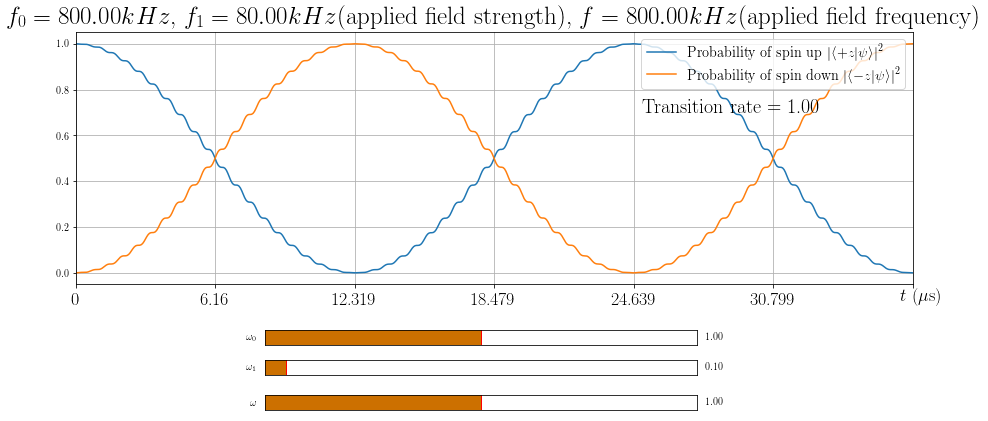

In [101]:
r0 = [1.0,0.,0.,0.]
w0,w1,w = 1.0,0.1,1.0

f0,f1,f_ac = np.array([w0,w1, w])*800 #kHz for plot title, with f0 as the frequency for ω0 and f1 as the frequency for ω1. f_ac is for the alternating current signal
t,P_up,P_down,transition_rate = P_z(1.0,0.1,1.0,r0)

fig= plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.3, top=0.8)
ax.plot(t,P_up,label='Probability of spin up $| \langle +z | \psi \\rangle |^2$')
ax.plot(t,P_down,label='Probability of spin down $| \langle -z | \psi \\rangle |^2$')
ax.set_title('$f_0= %0.2f kHz$, $f_1 = %0.2f kHz$(applied field strength), $f = %0.2f kHz$(applied field frequency)'%(f0,f1,f_ac), fontsize=25)
ax.set_xlim(0,3*T1)
ax.legend(loc='upper right', fontsize='x-large')
# ax.set_ylabel('$Probablity$ ')
ax.set_xlabel('$t$ ($\mu$s)',fontsize=18)
#ax.set_ylabel(fontsize=18)
ax.xaxis.set_label_coords(1.01, -0.01)

ax.set_xticks(np.arange(0,3.5*T1,T1/2))
ax.set_xticklabels(xtick_name,fontsize=18)
# ax.set_xticklabels(['','$\\frac{\pi}{\omega_1}$','$\\frac{2 \pi }{\omega_1}$','$\\frac{3 \pi }{\omega_1}$','$\\frac{4 \pi }{\omega_1}$','$\\frac{5 \pi }{\omega_1}$','$\\frac{6 \pi }{\omega_1}$'],fontsize=30)
ax.grid(True)

transition_rate = np.max(P_down)
ax.annotate("Transition rate = %0.2f"%transition_rate, (0.65,0.73),xycoords = "figure fraction", fontsize =20)

# Create axes for sliders
ax_w0 = fig.add_axes([0.3, 0.18, 0.4, 0.03])
ax_w0.spines['top'].set_visible(True)
ax_w0.spines['right'].set_visible(True)
ax_w1 = fig.add_axes([0.3, 0.12, 0.4, 0.03])
ax_w1.spines['top'].set_visible(True)
ax_w1.spines['right'].set_visible(True)
ax_w = fig.add_axes([0.3, 0.05, 0.4, 0.03])
ax_w.spines['top'].set_visible(True)
ax_w.spines['right'].set_visible(True)
# craet three sliders
w0_slider = Slider(ax=ax_w0,label='$\omega_0$',valmin=0.,valmax=2.,valinit=1.0,facecolor='#cc7000')
w1_slider = Slider(ax=ax_w1,label='$\omega_1$',valmin=0.,valmax=2.,valinit=0.1,facecolor='#cc7000')
w_slider = Slider(ax=ax_w,label='$\omega$',valmin=0.,valmax=2.,valinit=1.0,facecolor='#cc7000')


# Update values
def update(val):
    w0 = w0_slider.val
    w1 = w1_slider.val
    w = w_slider.val
    t,zup,zdown,transition_rate = P_z(w0,w1,w,r0) 
    P_zup_line.set_data(t, zdown)
    fig.canvas.draw_idle()

w0_slider.on_changed(update)
w1_slider.on_changed(update)
w_slider.on_changed(update)

plt.show()

### varying the frequency of the oscillating field - transition rate

In [72]:
### expectated transition_rate vs applied AC field frequency from Townsend Figure 4.6
def trans_rate_exp(w0,w1,w):
	w0 = w0*w00
	w1 = w1*w00
	w = w*w00
	y = w1**2/4/((w0-w)**2+w1**2/4)
	return y

0

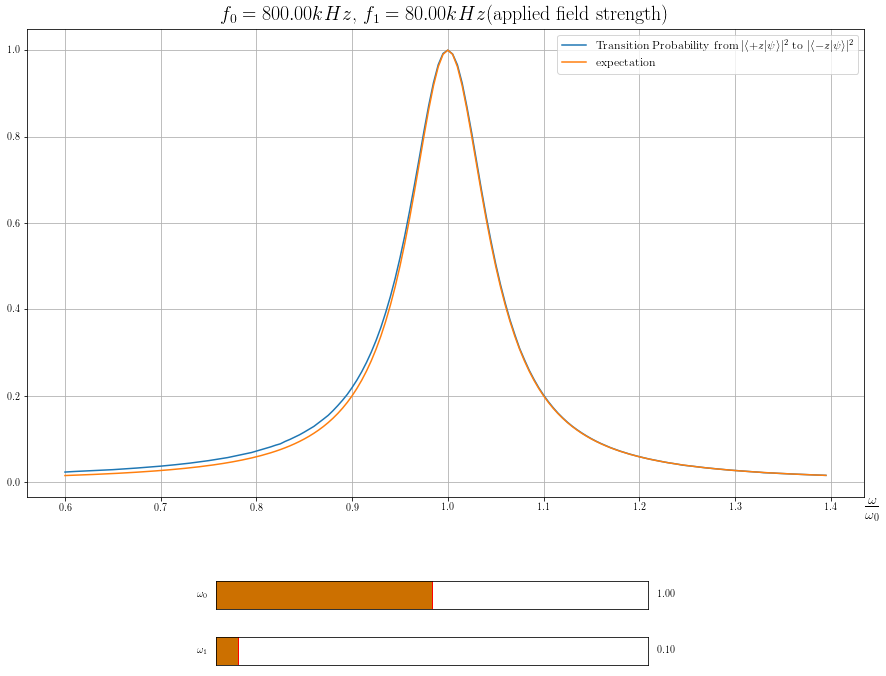

In [91]:
r0 = [1.,0.,0.,0.]
w0,w1 = 1.,0.1
f0,f1= np.array([w0,w1])*800 #kHZ for plot title
w_list = np.arange(0.6,1.4,0.005)
rate = np.array(list(map(lambda w: P_z(w0,w1,w,r0), w_list)))[:,3]

fig= plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.3, top=0.8)
transition_rate_line, = ax.plot(w_list,rate,label='Transition Probability from $| \langle +z | \psi \\rangle |^2$ to $| \langle -z | \psi \\rangle |^2$')
exp_line, = ax.plot(w_list, trans_rate_exp(w0,w1,w_list),label="expectation")

ax.legend(loc='upper right', fontsize='large')
ax.set_xlabel('$\\frac{\omega}{\omega_0}$', fontsize=20)
ax.xaxis.set_label_coords(1.01, -0.01)
ax.set_title('$f_0= %0.2f kHz$, $f_1 = %0.2f kHz$(applied field strength)'%(f0,f1), fontsize=20)
ax.grid(True)


ax_w0 = fig.add_axes([0.3, 0.18, 0.4, 0.03])
ax_w0.spines['top'].set_visible(True)
ax_w0.spines['right'].set_visible(True)
ax_w1 = fig.add_axes([0.3, 0.12, 0.4, 0.03])
ax_w1.spines['top'].set_visible(True)
ax_w1.spines['right'].set_visible(True)

w0_slider = Slider(ax=ax_w0,label='$\omega_0$',valmin=0.,valmax=2.,valinit=1.0, facecolor='#cc7000')
w1_slider = Slider(ax=ax_w1,label='$\omega_1$',valmin=0.,valmax=1.,valinit=0.1, facecolor='#cc7000')

# Update values
def update(val):
	w0 = w0_slider.val
	w1 = w1_slider.val
	rate = np.array(list(map(lambda w: P_z(w0,w1,w,r0), w_list)))[:,3]
	transition_rate_line.set_data(w_list,rate)
	exp_line.set_data(w_list, trans_rate_exp(w0,w1,w_list))
	fig.canvas.draw_idle()

w0_slider.on_changed(update)
w1_slider.on_changed(update)


### Interactively adjusting applied frequency and applied field strength

In [78]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
